# Importing Libraries

In [1]:
import pandas as pd
from pandas_datareader import data #will be used to download data from yahoo finance
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
from plotly.offline import iplot
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go
from scipy.stats import pearsonr
from scipy.stats import ttest_ind #Independent Sample T-test
from scipy.stats import f_oneway #One-Way ANOVA
init_notebook_mode(connected=True)

The SciPy library is one of the core packages that make up the SciPy stack. It provides many user-friendly and efficient numerical routines, such as routines for numerical integration, interpolation, optimization, linear algebra, and statistics.

For tutorials, reference documentation, the SciPy roadmap, and a contributor guide, please see the [documentation](https://docs.scipy.org/doc/).

# Reading Data

In [2]:
data_appl=pd.read_csv("Admission_Predict.csv")

# Data Transformation

In [3]:
#let's look at data
data_appl.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4.0,4.5,4.5,9.65,1,0.92
1,2,324,107,4.0,4.0,4.5,8.87,1,0.76
2,3,316,104,3.0,3.0,3.5,8.00,1,0.72
3,4,322,110,3.0,3.5,2.5,8.67,1,0.80
4,5,314,103,2.0,2.0,3.0,8.21,0,0.65


In [4]:
#let's see how many variables are in data and what are the types of variables
data_appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  399 non-null    float64
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               399 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    399 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 28.2 KB


    #SOP - Statement of Purpose
    #LOR -Letter of Recommendation
    #CGPA - Cummulative GPA

In [5]:
#let's check for missing values
data_appl.isna().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating     True
SOP                  False
LOR                  False
CGPA                  True
Research             False
Chance of Admit       True
dtype: bool

In [6]:
#let's see how many missing values are in each column
data_appl.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    1
SOP                  0
LOR                  0
CGPA                 1
Research             0
Chance of Admit      1
dtype: int64

In [7]:
#let's remove missing values
data_appl.dropna(inplace=True)

In [8]:
#let's replace space with "_" in variable names
data_appl.columns=data_appl.columns.str.replace(" ","_")

In [9]:
data_appl.head()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4.0,4.5,4.5,9.65,1,0.92
1,2,324,107,4.0,4.0,4.5,8.87,1,0.76
2,3,316,104,3.0,3.0,3.5,8.00,1,0.72
3,4,322,110,3.0,3.5,2.5,8.67,1,0.80
4,5,314,103,2.0,2.0,3.0,8.21,0,0.65


In [10]:
#let's drop Serial_No.' column since we will not use it
data_appl.drop('Serial_No.',inplace=True,axis=1)

In [11]:
#let's look at final data
data_appl.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4.0,4.5,4.5,9.65,1,0.92
1,324,107,4.0,4.0,4.5,8.87,1,0.76
2,316,104,3.0,3.0,3.5,8.00,1,0.72
3,322,110,3.0,3.5,2.5,8.67,1,0.80
4,314,103,2.0,2.0,3.0,8.21,0,0.65


In [12]:
data_appl.shape

(397, 8)

**In the end, there are 397 rows and 8 variables.**

# Descriptive and Inferential statistics

In [13]:
#let's get main descriptive statistics of the data
data_appl.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,316.901763,107.445844,3.095718,3.408060,3.457179,8.602569,0.549118,0.724987
std,11.461747,6.073224,1.141905,1.002389,0.899315,0.597044,0.498209,0.142798
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,309.000000,103.000000,2.000000,2.500000,3.000000,8.180000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.620000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.070000,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


From the descriptive statistics above we can do the following conclusions:

- 75% of students received GRE score less than 325. Mean GRE score is 316.9 and median score is 317. 
- 75% of students received TOEFL score less than 112. Mean and median TOEFL score is about 107. 
- 50% of universities have rating of 3 out of 5. 
- 75% of students had 83% or lower chances of getting admitted.

In [14]:
#let's see how many students did reasearch
data_appl.Research.value_counts()

1    218
0    179
Name: Research, dtype: int64

In [15]:
#let's see what % of applicants did reasearch
research=data_appl.Research.value_counts().rename_axis("Values").reset_index(name='Count') #saving value counts as datafraem
research['%']=research.Count/research.Count.sum()*100 #adding a new column for %
research

,Values,Count,%
0,1,218,54.911839
1,0,179,45.088161


**About 55% of applicants did research during their undergraduate studies.**

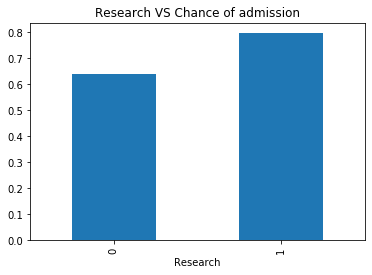

In [16]:
#let's visually see whether those who did reasearch have higher or lower chance to get admitted
data_appl.groupby("Research")["Chance_of_Admit"].mean().plot(kind='bar',title='Research VS Chance of admission')
plt.show()

**The table above and the chart illustrate the following:**


- Those students who did research during their undergraduate studies got higher GRE and TOEFL scores, as well as they received higher rating for their statements of purpose.

- In addition, students who did research were considered having higher chance of admission (see bar chart above).

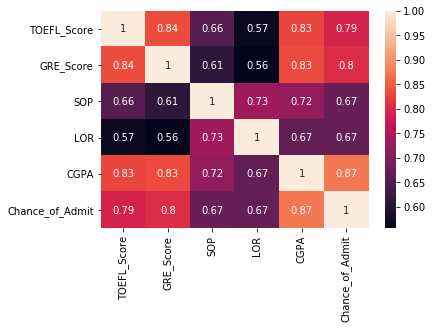

In [17]:
#lets visually look at the correlation between some variables
sns.heatmap(data_appl[['TOEFL_Score','GRE_Score','SOP','LOR','CGPA','Chance_of_Admit']].corr(method='pearson'),annot=True)
plt.show()

In [18]:
#Checking Pearson's correlation between variables in another way
#first value is correlation and the second one is p-value
pearsonr(data_appl.TOEFL_Score,data_appl.LOR)

(0.5668813139218156, 3.9544943681074704e-35)

**Correlation between TOEFL_Score and rating of Letter of Recommendation is 0.57 and it is statistically significant.**

Now let's visualise relationship between variables in another way by using <code>pairplot()</code> from seaborn.


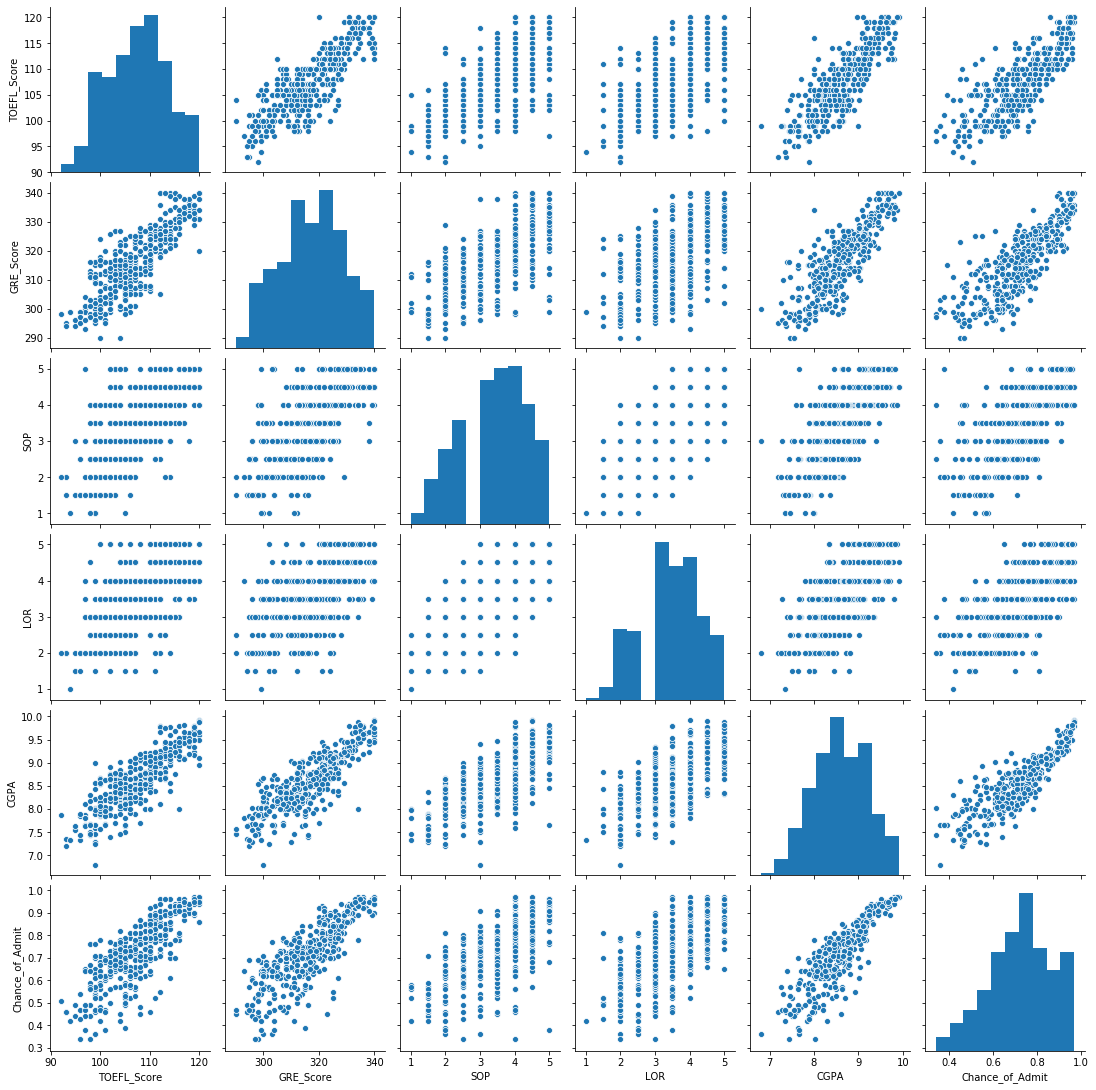

In [19]:
sns.pairplot(data_appl[['TOEFL_Score','GRE_Score','SOP','LOR','CGPA','Chance_of_Admit']])
plt.show()

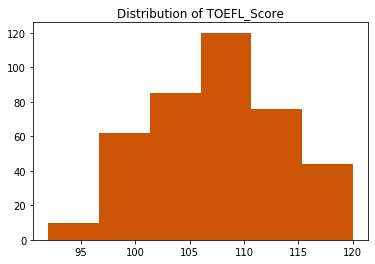

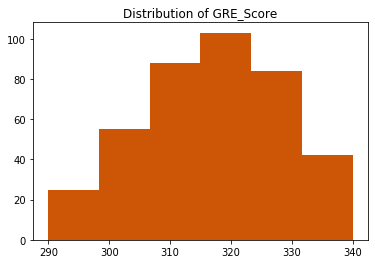

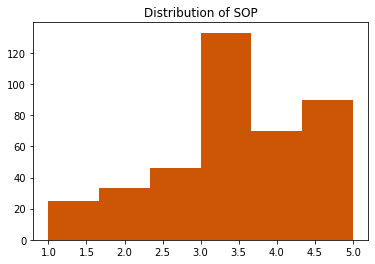

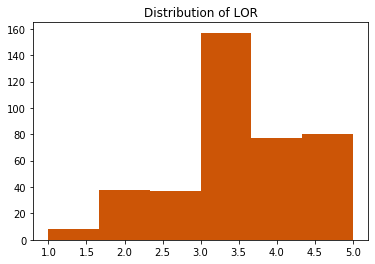

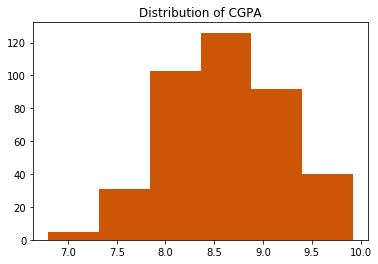

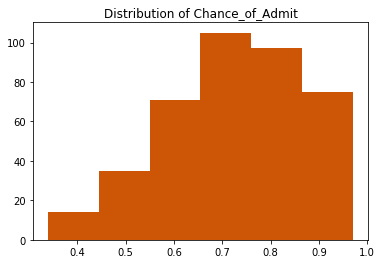

In [20]:
#another way of printing histograms for some variables
for i in data_appl[['TOEFL_Score','GRE_Score','SOP','LOR', 'CGPA','Chance_of_Admit']].columns:
    plt.hist(data_appl[i],
            bins=6,
            color='#cc5506')
    plt.title("Distribution of %s" %i) #giving heading to each chart
    plt.show(i)

In [21]:
#histograms in plotly
for i in data_appl[['TOEFL_Score','GRE_Score','SOP','LOR', 'CGPA','Chance_of_Admit']].columns:
    fig=go.Figure(data=[go.Histogram(x=data_appl[i],
                                    marker_color='#330C73')])
    fig.update_layout(
        title=i,
        height=500,
        width=500)
    fig.show()

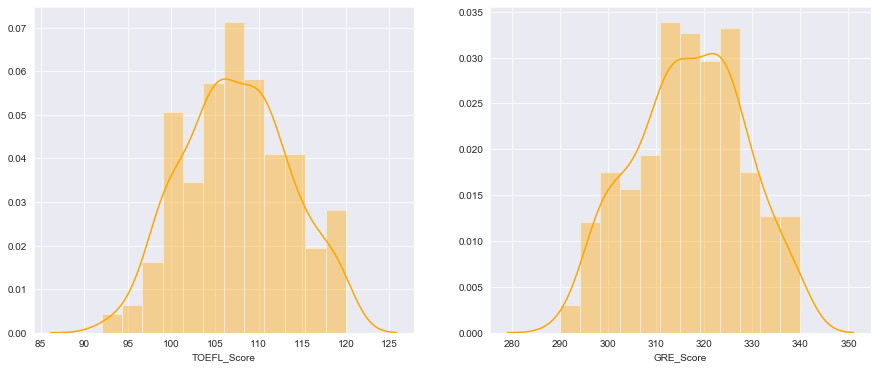

In [22]:
#printing 2 distribution plots at once
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))

#subplot() is for visualising two charts together
plt.subplot(1, #number of rows
            2, #number of columns
            1) #index of the current chart
sns.distplot(data_appl.TOEFL_Score, color='Orange')

plt.subplot(1,2,2)
sns.distplot(data_appl.GRE_Score, color='Orange')

plt.show()

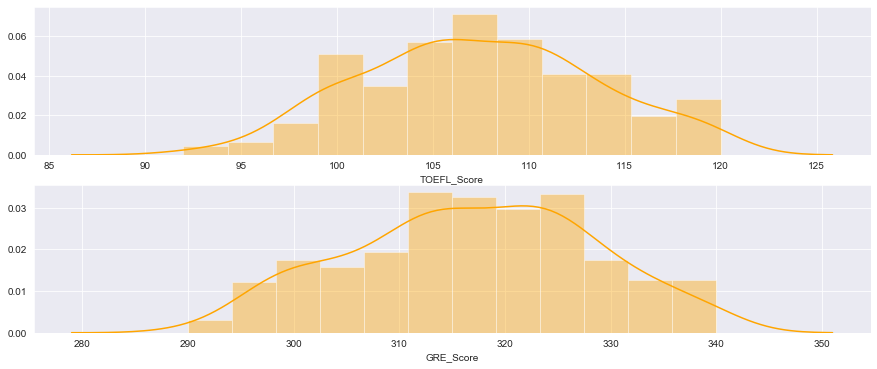

In [23]:
#printing 2 distribution plots at once
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))

#subplot() is for visualising two charts together
plt.subplot(2, #number of rows
            1, #number of columns
            1) #index of the current chart
sns.distplot(data_appl.TOEFL_Score, color='Orange')

plt.subplot(2,1,2)
sns.distplot(data_appl.GRE_Score, color='Orange')

plt.show()

### T-test

From T-test documentation: **This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.**

In [24]:
#let's look whether mean values of some variables differ by Research variable
pd.pivot_table(data=data_appl,columns='Research',values=['GRE_Score','TOEFL_Score','SOP', "Chance_of_Admit"], aggfunc='mean')

Research,0,1
Chance_of_Admit,0.638268,0.796193
GRE_Score,309.569832,322.922018
SOP,2.921788,3.807339
TOEFL_Score,104.178771,110.128440


In [25]:
print(ttest_ind(data_appl.TOEFL_Score,data_appl.Research,equal_var=True))
print(ttest_ind(data_appl.TOEFL_Score,data_appl.Research,equal_var=False))

Ttest_indResult(statistic=349.5295688630202, pvalue=0.0)
Ttest_indResult(statistic=349.5295688630202, pvalue=0.0)


The results above show that average TOEFL score is statistically significantly different between those who did reasearch and didn't do. 

Also, variance of TOEFL_Score by Research groups was the same therefore the outputs above are the same. 

In [26]:
for i in data_appl[['GRE_Score','TOEFL_Score','SOP', 'Chance_of_Admit']].columns:
    print('T-test results for %s : '%i,ttest_ind(data_appl[i],data_appl.Research))

T-test results for GRE_Score :  Ttest_indResult(statistic=549.4219751195559, pvalue=0.0)
T-test results for TOEFL_Score :  Ttest_indResult(statistic=349.5295688630202, pvalue=0.0)
T-test results for SOP :  Ttest_indResult(statistic=50.88921758954266, pvalue=7.36653120353753e-252)
T-test results for Chance_of_Admit :  Ttest_indResult(statistic=6.761273302759373, pvalue=2.6547836487141726e-11)


# ANOVA test

From One-Way ANOVA Scipy Documentation: **The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.**

In [27]:
data_appl.groupby('University_Rating')['TOEFL_Score'].mean()

University_Rating
1.0     99.080000
2.0    103.528302
3.0    106.893939
4.0    111.824324
5.0    113.666667
Name: TOEFL_Score, dtype: float64

**Let's see whether average TOEFL scores (see above) by groups of University ratings is statistically significantly different or not.**

In [28]:
#let's run One-Way ANOVA test
print(f_oneway(data_appl.TOEFL_Score,data_appl.University_Rating))

F_onewayResult(statistic=113200.81082588436, pvalue=0.0)


**Since p-value is less than 0.05 then the mean TOEFL scores are statistically significantly different by groups of University ratings.**

In [29]:
for i in data_appl[['GRE_Score','SOP','TOEFL_Score']].columns:
    print('One-Way ANOVA test for %s : '%i,f_oneway(data_appl[i],data_appl.University_Rating))

One-Way ANOVA test for GRE_Score :  F_onewayResult(statistic=294660.6270013594, pvalue=0.0)
One-Way ANOVA test for SOP :  F_onewayResult(statistic=16.775666740136653, pvalue=4.639471678085121e-05)
One-Way ANOVA test for TOEFL_Score :  F_onewayResult(statistic=113200.81082588436, pvalue=0.0)
